# **Credit Card Fraud Detection**

##Problem Statement: **Using different sampling and model-building techniques to identify fraud and fraudulent transactions.**

In [ ]:
%pip install dataprep
%pip install sweetviz
%pip install dtale

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Loading the data
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Checking shape
df.shape

(284807, 31)

In [6]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##Data Exploration And Visualization:

In [8]:
# Checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


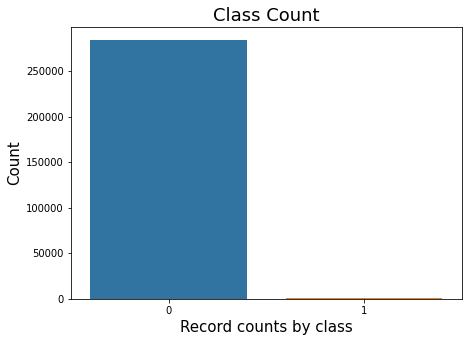

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

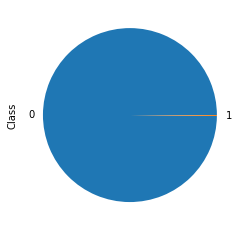

In [10]:
#plotting pie chart
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

In [11]:
# Checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


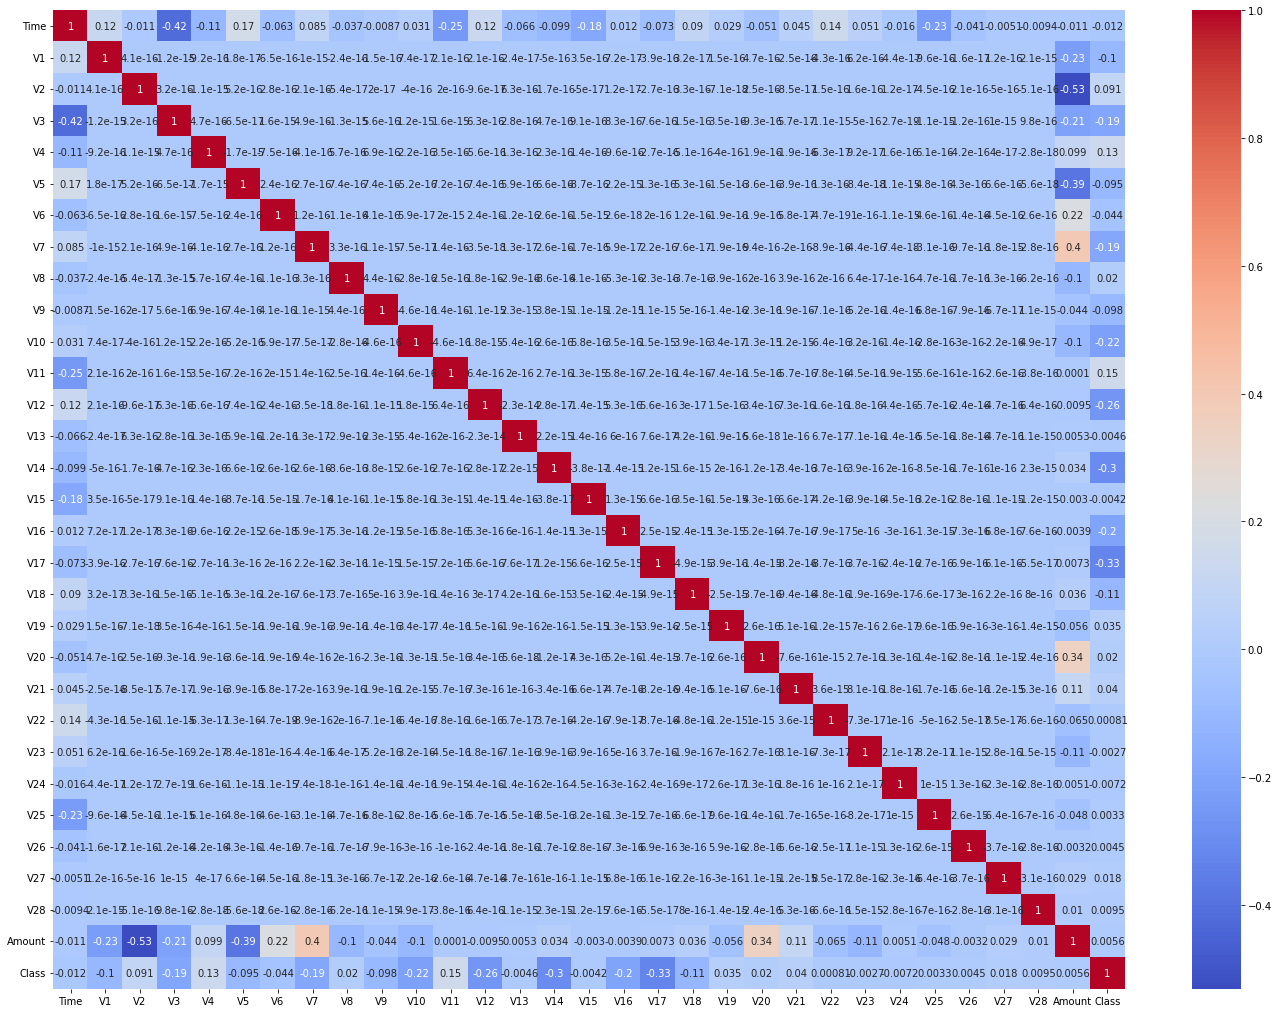

In [12]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

##Data Pre-Processing

In [13]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly unbalanced. (Here zero represent normal transaction and 1 represent fraudulent transaction.

In [14]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Applying **Under-Sampling** to deal with imbalance dataset.

Building a sample dataset which contains similar distribution of normal transactions and Fraudulent Transactions i.e. Number of Fraudulent Transactions for new sampled dataset would be 492

In [18]:
legit_sample = legit.sample(n=492)

In [19]:
#Concatenating two dataframes
df2 = pd.concat([legit_sample, fraud], axis=0)

In [20]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
172215,121006.0,-0.376720,-0.888490,1.696811,-1.843851,-0.395098,-0.114737,-0.933017,0.332933,-0.565160,...,0.377603,0.843421,-0.016992,-0.395218,-0.158621,-0.219230,0.009660,-0.012441,31.55,0
55935,47195.0,-1.297164,1.286546,0.784781,0.131154,-0.553332,-0.185993,-0.025009,0.621953,0.708615,...,-0.000494,0.286726,0.029603,0.083454,-0.495205,0.309241,0.362406,0.298771,10.00,0
239420,150102.0,-1.013260,-0.690031,0.640913,0.222468,2.793460,4.104515,-1.195560,1.259633,-0.074037,...,0.311450,0.696143,-0.132050,0.757292,0.423026,0.379446,0.123706,0.106834,47.00,0
4932,4484.0,-4.006222,-3.553521,0.629009,-2.388878,-1.050256,2.243252,1.916643,0.067661,2.953998,...,-0.032845,0.802352,-0.017041,-1.737267,0.386694,0.052166,0.974742,-0.295352,1000.00,0
186424,127102.0,-1.152822,0.552629,2.367021,-0.739211,-1.055514,0.009200,-0.408181,0.705182,0.356088,...,0.269834,0.613365,-0.247458,0.019111,0.234294,0.753697,-0.108150,-0.001716,40.50,0


In [21]:
df2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
df2['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [23]:
#To check if our sample is good or bad
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91357.455285,-0.119646,-0.024888,0.074803,-0.035553,-0.043441,0.105859,-0.038738,0.062934,0.030794,...,-0.023934,0.008011,0.044111,0.011433,-0.046196,0.065674,0.022378,0.006934,-0.020007,87.192805
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [24]:
# Checking the % distribution of normal vs fraud
classes=df2['Class'].value_counts()
normal_share1=classes[0]/df2['Class'].count()*100
fraud_share1=classes[1]/df2['Class'].count()*100
print(normal_share1)
print(fraud_share1)

50.0
50.0


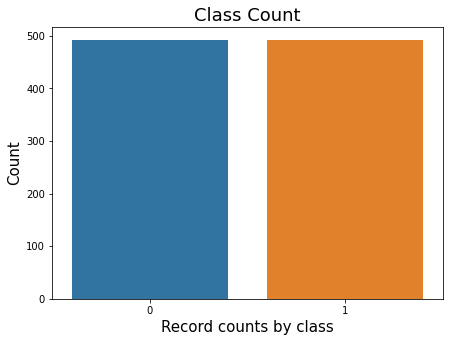

In [25]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df2['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

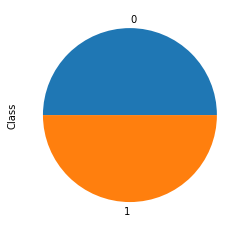

In [26]:

((df2.groupby('Class')['Class'].count()/df2['Class'].count()) *100).plot.pie()

##Splitting the dataset into train and test

In [27]:
y= df2['Class']
X = df2.drop(['Class'], axis=1)

In [28]:
# Checking some rows of X
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
172215,121006.0,-0.376720,-0.888490,1.696811,-1.843851,-0.395098,-0.114737,-0.933017,0.332933,-0.565160,...,0.235383,0.377603,0.843421,-0.016992,-0.395218,-0.158621,-0.219230,0.009660,-0.012441,31.55
55935,47195.0,-1.297164,1.286546,0.784781,0.131154,-0.553332,-0.185993,-0.025009,0.621953,0.708615,...,0.062239,-0.000494,0.286726,0.029603,0.083454,-0.495205,0.309241,0.362406,0.298771,10.00
239420,150102.0,-1.013260,-0.690031,0.640913,0.222468,2.793460,4.104515,-1.195560,1.259633,-0.074037,...,0.708008,0.311450,0.696143,-0.132050,0.757292,0.423026,0.379446,0.123706,0.106834,47.00
4932,4484.0,-4.006222,-3.553521,0.629009,-2.388878,-1.050256,2.243252,1.916643,0.067661,2.953998,...,-0.450059,-0.032845,0.802352,-0.017041,-1.737267,0.386694,0.052166,0.974742,-0.295352,1000.00
186424,127102.0,-1.152822,0.552629,2.367021,-0.739211,-1.055514,0.009200,-0.408181,0.705182,0.356088,...,-0.103232,0.269834,0.613365,-0.247458,0.019111,0.234294,0.753697,-0.108150,-0.001716,40.50


In [29]:
# Checking some rows of y
y.head()

172215    0
55935     0
239420    0
4932      0
186424    0
Name: Class, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

**Plotting the distribution of the variable**

In [31]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

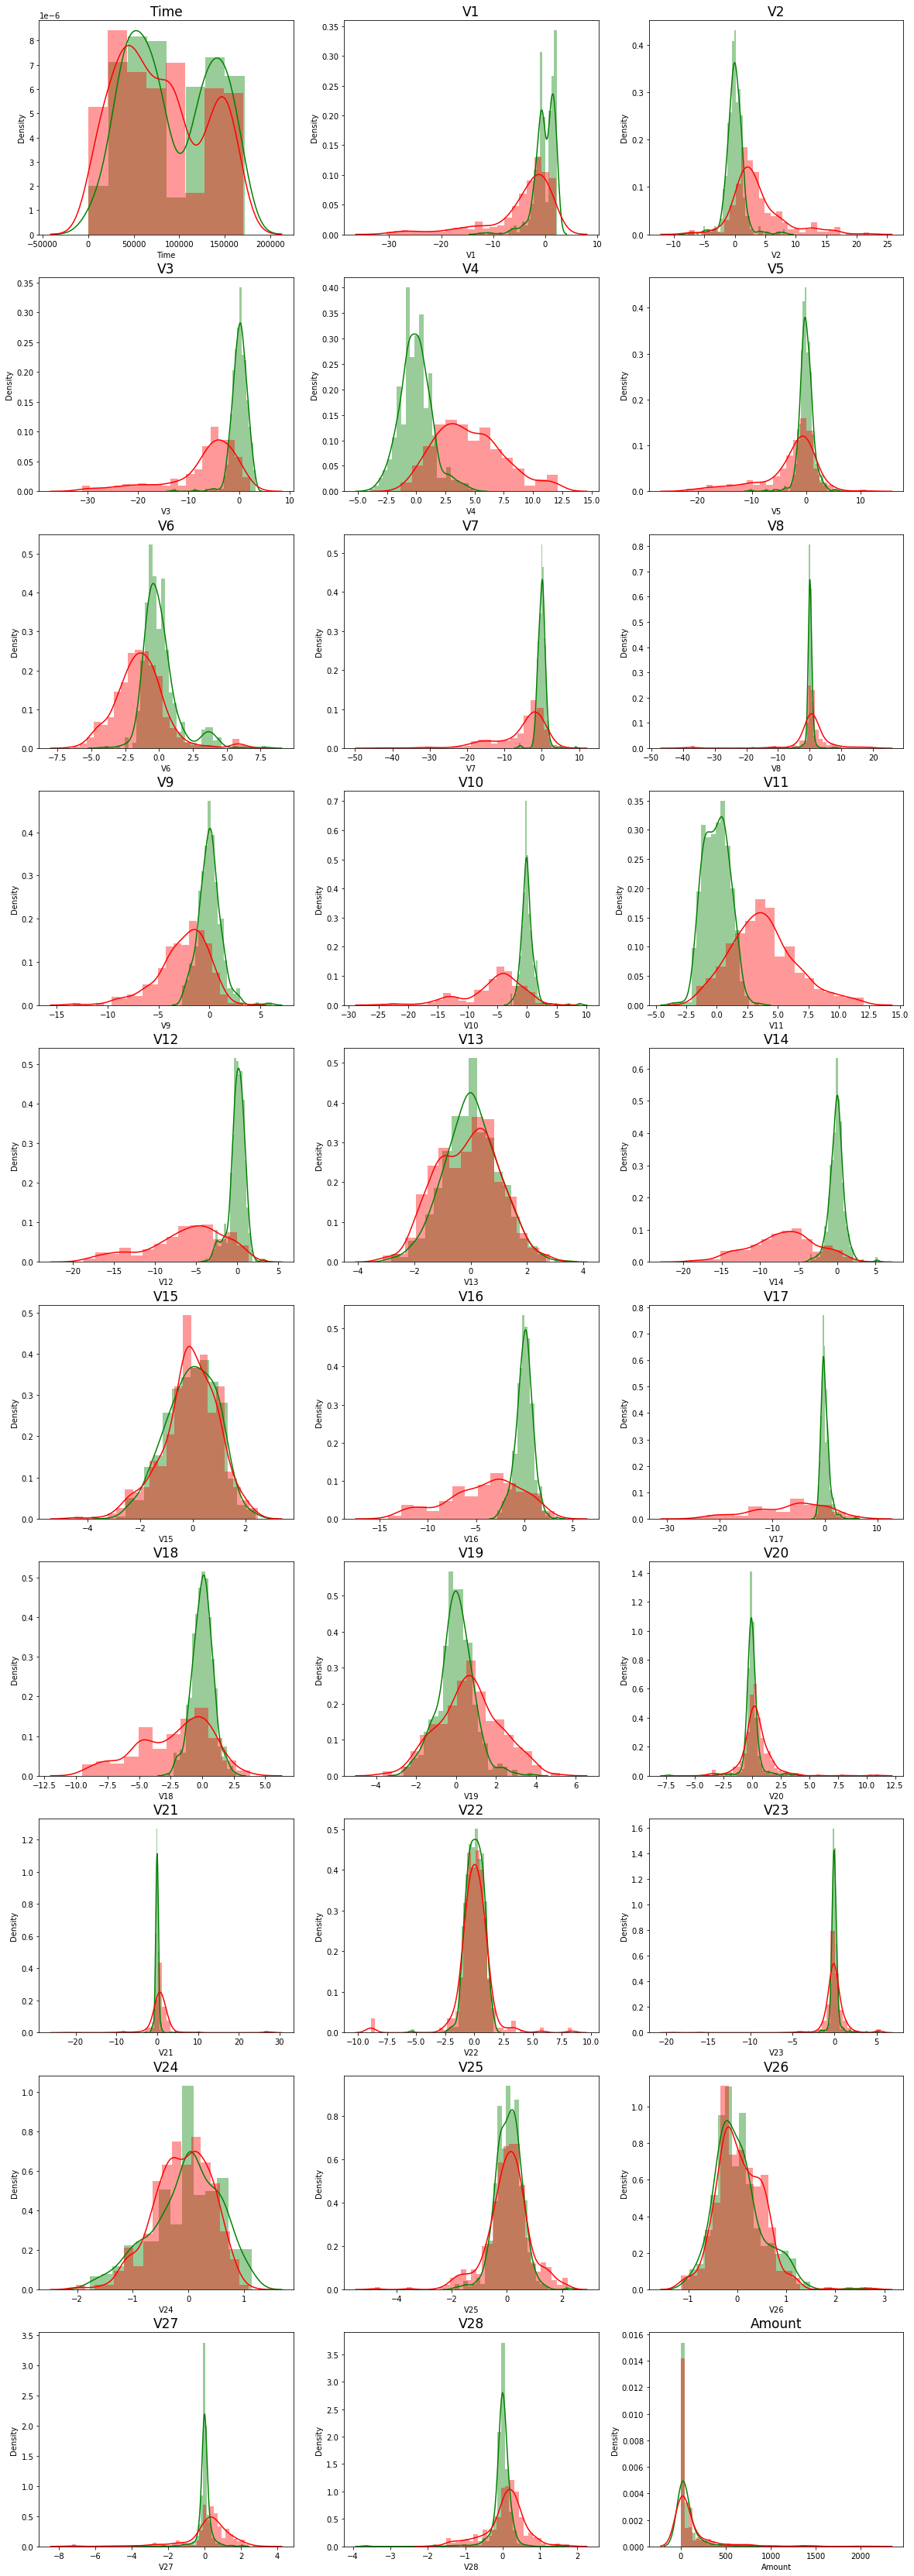

In [32]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df2.Class == 0
fraud_records = df2.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

##Model Training

In [33]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Model','Accuracy','roc_value','threshold'])

In [34]:
# Creating a function to plot confusion matrix
def Plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.clf()
  plt.show()

Confusion Matrix


<Figure size 432x288 with 0 Axes>

classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       106
           1       0.93      0.88      0.90        91

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

log_roc_value: 0.9520008293593198
logistic threshold: 0.512664783512932
ROC for the test dataset 95.2%


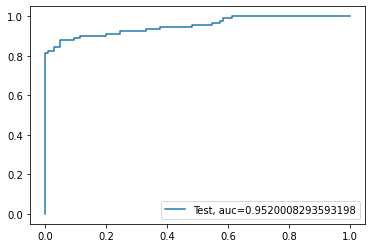

                 Model  Accuracy  roc_value  threshold
0  Logistic Regression  0.913706   0.952001   0.512665


In [35]:
# Logistic Regression
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predicting the test probablities
y_pred_prob = classifier.predict_proba(X_test)[:,1]

# finding Accuaracy 
accuracy_logistic = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

# Making the Confusion Matrix
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))

#ROC_AUC
log_roc_value = roc_auc_score(y_test, y_pred_prob)
print("log_roc_value: {0}" .format(log_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print("logistic threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
  
df_Results = df_Results.append(pd.DataFrame({'Model': 'Logistic Regression','Accuracy': accuracy_logistic,'roc_value': log_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

print(df_Results)

model score
0.6192893401015228
Confusion Matrix


<Figure size 432x288 with 0 Axes>

classification Report
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       106
           1       0.59      0.60      0.59        91

    accuracy                           0.62       197
   macro avg       0.62      0.62      0.62       197
weighted avg       0.62      0.62      0.62       197

KNN roc_value: 0.6414575990047688
KNN threshold: 0.6
ROC for the test dataset 64.1%


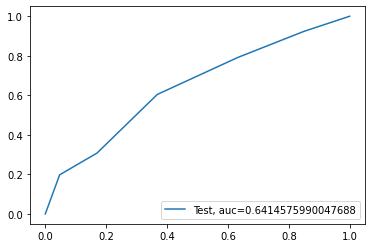

                 Model  Accuracy  roc_value  threshold
0  Logistic Regression  0.913706   0.952001   0.512665
1                  KNN  0.619289   0.641458   0.600000


In [36]:
# Fitting K-NN to the Training set
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
score = knn.score(X_test,y_test)
print("model score")
print(score)

#Accuracy
y_pred = knn.predict(X_test)
KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))

knn_probs = knn.predict_proba(X_test)[:, 1]

# Calculate roc auc
knn_roc_value = roc_auc_score(y_test, knn_probs)
print("KNN roc_value: {0}" .format(knn_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("KNN threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

df_Results = df_Results.append(pd.DataFrame({'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
print(df_Results)

gini score: 0.868020304568528
Confusion Matrix


<Figure size 432x288 with 0 Axes>

classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       106
           1       0.86      0.86      0.86        91

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197

gini tree_roc_value: 0.8672506738544474
Tree threshold: 1.0
ROC for the test dataset 86.7%


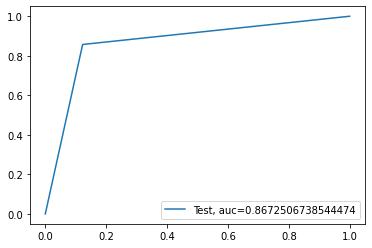

entropy score: 0.883248730964467
Confusion Matrix


<Figure size 432x288 with 0 Axes>

classification Report
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       106
           1       0.88      0.87      0.87        91

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197

entropy tree_roc_value: 0.8821791416131038
Tree threshold: 1.0
ROC for the test dataset 88.2%


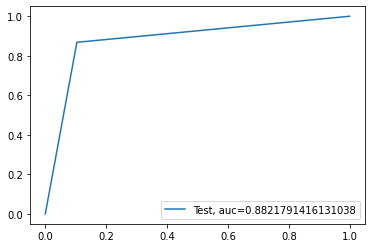

                              Model  Accuracy  roc_value  threshold
0               Logistic Regression  0.913706   0.952001   0.512665
1                               KNN  0.619289   0.641458   0.600000
2     Tree Model with gini criteria  0.868020   0.867251   1.000000
3  Tree Model with entropy criteria  0.883249   0.882179   1.000000


In [37]:
#Evaluating Decision Tree model with 'gini' & 'entropy'
criteria = ['gini', 'entropy'] 
scores = {} 
    
for c in criteria: 
    dt = DecisionTreeClassifier(criterion = c, random_state=42) 
    dt.fit(X_train, y_train) 
    y_pred = dt.predict(X_test)
    test_score = dt.score(X_test, y_test) 
    tree_preds = dt.predict_proba(X_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score 
    print(c + " score: {0}" .format(test_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    print(c + " tree_roc_value: {0}" .format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
print(df_Results)

Model Accuracy: 0.934010152284264
Confusion Matrix


<Figure size 432x288 with 0 Axes>

classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       106
           1       0.98      0.88      0.92        91

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

Random Forest roc_value: 0.9613829566659756
Random Forest threshold: 0.49
ROC for the test dataset 96.1%


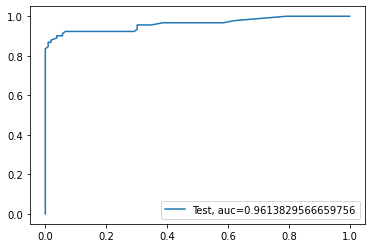

,Model,Accuracy,roc_value,threshold
0,Logistic Regression,0.913706,0.952001,0.512665
1,KNN,0.619289,0.641458,0.600000
2,Tree Model with gini criteria,0.868020,0.867251,1.000000
3,Tree Model with entropy criteria,0.883249,0.882179,1.000000
4,Random Forest,0.934010,0.961383,0.490000


In [38]:
#Random Forest model
# Create the model with 100 trees
RF_model = RandomForestClassifier(n_estimators=100, 
                            bootstrap = True,
                            max_features = 'sqrt', random_state=42)
# Fit on training data
RF_model.fit(X_train, y_train)
RF_test_score = RF_model.score(X_test, y_test)
RF_model.predict(X_test)

print('Model Accuracy: {0}'.format(RF_test_score))


# Actual class predictions
rf_predictions = RF_model.predict(X_test)

print("Confusion Matrix")
Plot_confusion_matrix(y_test, rf_predictions)
print("classification Report")
print(classification_report(y_test, rf_predictions))

# Probabilities for each class
rf_probs = RF_model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

print("Random Forest roc_value: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Random Forest threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

df_Results = df_Results.append(pd.DataFrame({'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
(df_Results)

accuracy_score : 0.4720812182741117
Confusion Matrix


<Figure size 432x288 with 0 Axes>

classification Report
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       106
           1       0.43      0.47      0.45        91

    accuracy                           0.47       197
   macro avg       0.47      0.47      0.47       197
weighted avg       0.48      0.47      0.47       197

SVM roc_value: 0.49688990255027987
SVM threshold: 0.5098960502646396
ROC for the test dataset 49.7%


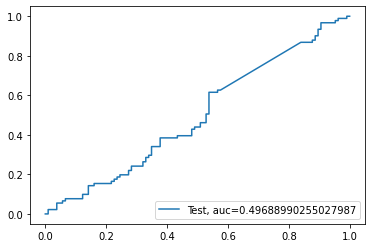

                              Model  Accuracy  roc_value  threshold
0               Logistic Regression  0.913706   0.952001   0.512665
1                               KNN  0.619289   0.641458   0.600000
2     Tree Model with gini criteria  0.868020   0.867251   1.000000
3  Tree Model with entropy criteria  0.883249   0.882179   1.000000
4                     Random Forest  0.934010   0.961383   0.490000
5                               SVM  0.472081   0.496890   0.509896


In [39]:
#SVM model with sigmoid kernel  model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

clf = SVC(kernel='sigmoid', random_state=42)
clf.fit(X_train,y_train)
y_pred_SVM = clf.predict(X_test)
SVM_Score = accuracy_score(y_test,y_pred_SVM)
print("accuracy_score : {0}".format(SVM_Score))
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred_SVM)
print("classification Report")
print(classification_report(y_test, y_pred_SVM))

# Run classifier
classifier = SVC(kernel='sigmoid' , probability=True)
svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, svm_probs)

print("SVM roc_value: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("SVM threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

df_Results = df_Results.append(pd.DataFrame({'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

print(df_Results)

##Conclusion
Random Forest Model gives the best accuracy of 93.4% among all models. The second best model is logistic regression model.